# PD8
Oryginalna wizualizacja: https://www.reddit.com/r/dataisbeautiful/comments/k5lsqt/oc_air_travel_over_thanksgiving_in_the_us_down/ 
![wykres](https://i.redd.it/36p9i2wi4v261.png)
Źródło danych (dla mojego wykresu): https://www.tsa.gov/coronavirus/passenger-throughput

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("TSA_COVID.csv")

In [5]:
# rolling avg
df["2020"] = df["2020"].rolling(7, min_periods=1).mean()
df["2019"] = df["2019"].rolling(7, min_periods=1).mean()
df = df.astype({"2020":"int32", "2019":"int32"})

In [6]:
# pivot to long
df = df.melt("Date", ["2020", "2019"], "Year", "Count")
df = df.sort_values("Date")
df["Date"] = pd.to_datetime(df["Date"])

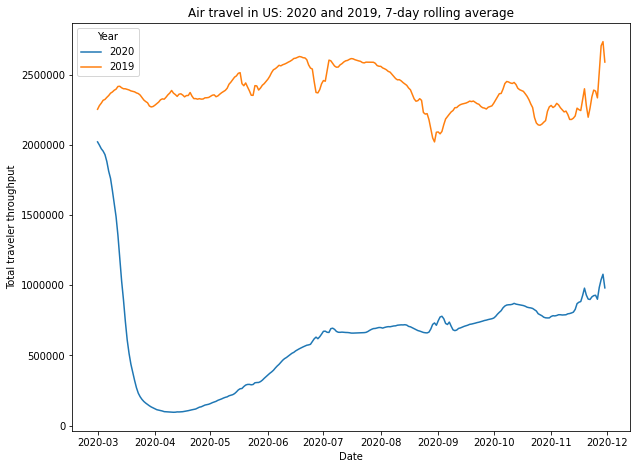

In [7]:
plt.figure(figsize=(10, 7.5))
plt.title("Air travel in US: 2020 and 2019, 7-day rolling average")
plt.ylabel("Total traveler throughput")
plt.ticklabel_format(style="plain", axis="y")
sns.lineplot(data = df, x = "Date", y = "Count", hue="Year")
plt.show()

Może nie jest tak "designerski" jak oryginalny, ale pokazuje znacznie więcej - na przykład asymetrię na początku września lub różnicę wysokości skoku na święto dziękczynienia. Dodatkowo, od razu jest jasne co się na nim dzieje, podczas gdy na orginalnym wykresie ujemna oś procentowa jest dosyć nietypowa i może mylić.